In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
% matplotlib inline

### Loading Training Transactions Data

In [2]:
tr_tr = pd.read_csv('data/train_transaction.csv', index_col='TransactionID')
print('Rows :', tr_tr.shape[0],'  Columns : ',tr_tr.shape[1] )
tr_tr.tail()
print('Memory Usage : ', (tr_tr.memory_usage(deep=True).sum()/1024).round(0))
tr_tr.tail()

Rows : 590540   Columns :  393
Memory Usage :  2162614.0


,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577539,0,15811131,279.95,W,15066,170.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
tr_tr.isFraud.describe()

count    590540.000000
mean          0.034990
std           0.183755
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: isFraud, dtype: float64

0    569877
1     20663
Name: isFraud, dtype: int64

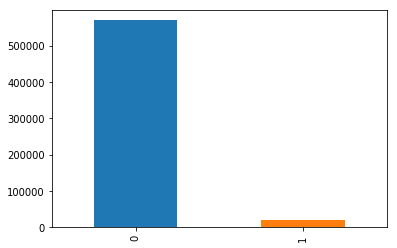

In [4]:
tr_tr.isFraud.value_counts().plot(kind='bar')
tr_tr.isFraud.value_counts()

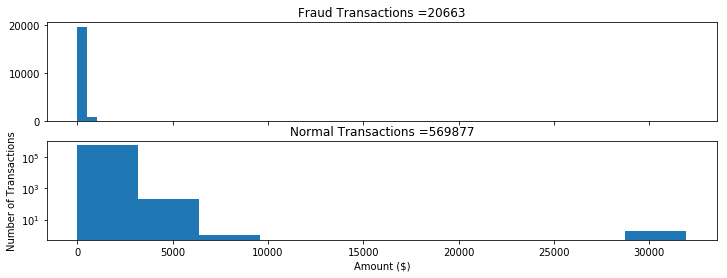

In [5]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
ax1.hist(tr_tr.TransactionAmt[tr_tr.isFraud == 1], bins = 10)
ax1.set_title('Fraud Transactions ='+str(tr_tr.isFraud.value_counts()[1]))
ax2.hist(tr_tr.TransactionAmt[tr_tr.isFraud == 0], bins = 10)
ax2.set_title('Normal Transactions ='+str(tr_tr.isFraud.value_counts()[0]))
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

### Exploratory Analysis of category Items in Training Transactions data

In [6]:
for i in tr_tr.columns:
    if tr_tr[i].dtypes == str('object'):
        print('Column Name :', i)
        print('Unique Items :', tr_tr[i].unique())
        print('Number of NaNs :', tr_tr[i].isna().sum())
        print('Number of Frauds :','\n', tr_tr[tr_tr.isFraud==1][i].value_counts(dropna=False))
        print('*'*50)

Column Name : ProductCD
Unique Items : ['W' 'H' 'C' 'S' 'R']
Number of NaNs : 0
Number of Frauds : 
 W    8969
C    8008
H    1574
R    1426
S     686
Name: ProductCD, dtype: int64
**************************************************
Column Name : card4
Unique Items : ['discover' 'mastercard' 'visa' 'american express' nan]
Number of NaNs : 1577
Number of Frauds : 
 visa                13373
mastercard           6496
discover              514
american express      239
NaN                    41
Name: card4, dtype: int64
**************************************************
Column Name : card6
Unique Items : ['credit' 'debit' nan 'debit or credit' 'charge card']
Number of NaNs : 1571
Number of Frauds : 
 debit     10674
credit     9950
NaN          39
Name: card6, dtype: int64
**************************************************
Column Name : P_emaildomain
Unique Items : [nan 'gmail.com' 'outlook.com' 'yahoo.com' 'mail.com' 'anonymous.com'
 'hotmail.com' 'verizon.net' 'aol.com' 'me.com' 'comcast

### Exploratory Analysis of Float Items in Training Transactions data

In [7]:
for i in tr_tr.columns:
    if tr_tr[i].dtypes == 'float64':
        print('Column Name :', i)
        print('Number of NaNs :', tr_tr[i].isna().sum())
        print('*'*50)

Column Name : TransactionAmt
Number of NaNs : 0
**************************************************
Column Name : card2
Number of NaNs : 8933
**************************************************
Column Name : card3
Number of NaNs : 1565
**************************************************
Column Name : card5
Number of NaNs : 4259
**************************************************
Column Name : addr1
Number of NaNs : 65706
**************************************************
Column Name : addr2
Number of NaNs : 65706
**************************************************
Column Name : dist1
Number of NaNs : 352271
**************************************************
Column Name : dist2
Number of NaNs : 552913
**************************************************
Column Name : C1
Number of NaNs : 0
**************************************************
Column Name : C2
Number of NaNs : 0
**************************************************
Column Name : C3
Number of NaNs : 0
**********************************

Number of NaNs : 77096
**************************************************
Column Name : V72
Number of NaNs : 77096
**************************************************
Column Name : V73
Number of NaNs : 77096
**************************************************
Column Name : V74
Number of NaNs : 77096
**************************************************
Column Name : V75
Number of NaNs : 89164
**************************************************
Column Name : V76
Number of NaNs : 89164
**************************************************
Column Name : V77
Number of NaNs : 89164
**************************************************
Column Name : V78
Number of NaNs : 89164
**************************************************
Column Name : V79
Number of NaNs : 89164
**************************************************
Column Name : V80
Number of NaNs : 89164
**************************************************
Column Name : V81
Number of NaNs : 89164
**************************************************
Column

Number of NaNs : 508589
**************************************************
Column Name : V161
Number of NaNs : 508595
**************************************************
Column Name : V162
Number of NaNs : 508595
**************************************************
Column Name : V163
Number of NaNs : 508595
**************************************************
Column Name : V164
Number of NaNs : 508589
**************************************************
Column Name : V165
Number of NaNs : 508589
**************************************************
Column Name : V166
Number of NaNs : 508589
**************************************************
Column Name : V167
Number of NaNs : 450909
**************************************************
Column Name : V168
Number of NaNs : 450909
**************************************************
Column Name : V169
Number of NaNs : 450721
**************************************************
Column Name : V170
Number of NaNs : 450721
************************************

Number of NaNs : 449124
**************************************************
Column Name : V257
Number of NaNs : 460110
**************************************************
Column Name : V258
Number of NaNs : 460110
**************************************************
Column Name : V259
Number of NaNs : 449124
**************************************************
Column Name : V260
Number of NaNs : 460110
**************************************************
Column Name : V261
Number of NaNs : 460110
**************************************************
Column Name : V262
Number of NaNs : 460110
**************************************************
Column Name : V263
Number of NaNs : 460110
**************************************************
Column Name : V264
Number of NaNs : 460110
**************************************************
Column Name : V265
Number of NaNs : 460110
**************************************************
Column Name : V266
Number of NaNs : 460110
************************************

### Exploratory Analysis of Int Items in Training Transactions data

In [8]:
for i in tr_tr.columns:
    if tr_tr[i].dtypes == 'int64':
        print('Column Name :', i)
        print('Number of NaNs :', tr_tr[i].isna().sum())
        print('*'*50)

Column Name : isFraud
Number of NaNs : 0
**************************************************
Column Name : TransactionDT
Number of NaNs : 0
**************************************************
Column Name : card1
Number of NaNs : 0
**************************************************


### Loading Test Transactions Data

In [9]:
te_tr = pd.read_csv('data/test_transaction.csv', index_col='TransactionID')
print(te_tr.shape)
te_tr.tail()

(506691, 392)


,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,284.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,327.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4170238,34214337,202.000,W,16621,516.0,150.0,mastercard,224.0,debit,177.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4170239,34214345,24.346,C,5713,168.0,144.0,visa,147.0,credit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Analysis of category Items in Test Transactions data

In [10]:
for i in te_tr.columns:
    if te_tr[i].dtypes == str('object'):
        print('Column Name :', i)
        print('Unique Items :', te_tr[i].unique())
        print('Number of NaNs :', te_tr[i].isna().sum())
        print('*'*50)

Column Name : ProductCD
Unique Items : ['W' 'C' 'S' 'H' 'R']
Number of NaNs : 0
**************************************************
Column Name : card4
Unique Items : ['visa' 'mastercard' 'american express' 'discover' nan]
Number of NaNs : 3086
**************************************************
Column Name : card6
Unique Items : ['debit' 'credit' nan 'charge card']
Number of NaNs : 3007
**************************************************
Column Name : P_emaildomain
Unique Items : ['gmail.com' 'aol.com' 'hotmail.com' nan 'att.net' 'twc.com' 'yahoo.com'
 'verizon.net' 'anonymous.com' 'msn.com' 'q.com' 'outlook.com'
 'icloud.com' 'bellsouth.net' 'sbcglobal.net' 'web.de' 'live.com.mx'
 'ymail.com' 'comcast.net' 'mail.com' 'cox.net' 'me.com' 'aim.com'
 'charter.net' 'rocketmail.com' 'outlook.es' 'centurylink.net' 'live.com'
 'yahoo.de' 'cfl.rr.com' 'mac.com' 'frontier.com' 'netzero.net'
 'frontiernet.net' 'juno.com' 'windstream.net' 'yahoo.fr' 'netzero.com'
 'optonline.net' 'yahoo.co.uk' 'cab

### Exploratory Analysis of Float Items in Test Transactions data

In [11]:
for i in te_tr.columns:
    if te_tr[i].dtypes == 'float64':
        print('Column Name :', i)
        print('Number of NaNs :', te_tr[i].isna().sum())
        print('*'*50)

Column Name : TransactionAmt
Number of NaNs : 0
**************************************************
Column Name : card2
Number of NaNs : 8654
**************************************************
Column Name : card3
Number of NaNs : 3002
**************************************************
Column Name : card5
Number of NaNs : 4547
**************************************************
Column Name : addr1
Number of NaNs : 65609
**************************************************
Column Name : addr2
Number of NaNs : 65609
**************************************************
Column Name : dist1
Number of NaNs : 291217
**************************************************
Column Name : dist2
Number of NaNs : 470255
**************************************************
Column Name : C1
Number of NaNs : 3
**************************************************
Column Name : C2
Number of NaNs : 3
**************************************************
Column Name : C3
Number of NaNs : 3
**********************************

Number of NaNs : 12899
**************************************************
Column Name : V61
Number of NaNs : 12899
**************************************************
Column Name : V62
Number of NaNs : 12899
**************************************************
Column Name : V63
Number of NaNs : 12899
**************************************************
Column Name : V64
Number of NaNs : 12899
**************************************************
Column Name : V65
Number of NaNs : 12899
**************************************************
Column Name : V66
Number of NaNs : 12899
**************************************************
Column Name : V67
Number of NaNs : 12899
**************************************************
Column Name : V68
Number of NaNs : 12899
**************************************************
Column Name : V69
Number of NaNs : 12899
**************************************************
Column Name : V70
Number of NaNs : 12899
**************************************************
Column

Number of NaNs : 430636
**************************************************
Column Name : V153
Number of NaNs : 430906
**************************************************
Column Name : V154
Number of NaNs : 430906
**************************************************
Column Name : V155
Number of NaNs : 430906
**************************************************
Column Name : V156
Number of NaNs : 430906
**************************************************
Column Name : V157
Number of NaNs : 430906
**************************************************
Column Name : V158
Number of NaNs : 430906
**************************************************
Column Name : V159
Number of NaNs : 430636
**************************************************
Column Name : V160
Number of NaNs : 430636
**************************************************
Column Name : V161
Number of NaNs : 430906
**************************************************
Column Name : V162
Number of NaNs : 430906
************************************

Number of NaNs : 379963
**************************************************
Column Name : V243
Number of NaNs : 379963
**************************************************
Column Name : V244
Number of NaNs : 379963
**************************************************
Column Name : V245
Number of NaNs : 369375
**************************************************
Column Name : V246
Number of NaNs : 379963
**************************************************
Column Name : V247
Number of NaNs : 379963
**************************************************
Column Name : V248
Number of NaNs : 379963
**************************************************
Column Name : V249
Number of NaNs : 379963
**************************************************
Column Name : V250
Number of NaNs : 369375
**************************************************
Column Name : V251
Number of NaNs : 369375
**************************************************
Column Name : V252
Number of NaNs : 379963
************************************

Number of NaNs : 430260
**************************************************
Column Name : V333
Number of NaNs : 430260
**************************************************
Column Name : V334
Number of NaNs : 430260
**************************************************
Column Name : V335
Number of NaNs : 430260
**************************************************
Column Name : V336
Number of NaNs : 430260
**************************************************
Column Name : V337
Number of NaNs : 430260
**************************************************
Column Name : V338
Number of NaNs : 430260
**************************************************
Column Name : V339
Number of NaNs : 430260
**************************************************


### Check for any missing column in Test transaction data for integrity

In [12]:
for i in tr_tr.columns:
    if i in te_tr.columns:
        pass
    elif i == str('isFraud'):
        print('All columns are present in Test Transactions data')
    else:
        print(i)

All columns are present in Test Transactions data


### Check for any mismatching category items between Training and Test transaction data

In [13]:
for i in te_tr.columns:
    if te_tr[i].dtypes == str('object'):
        for j in te_tr[i].unique():
            if j in tr_tr[i].unique():
                pass
            else:
                print(j,': item is in test but not in training for category : ',i)

nan : item is in test but not in training for category :  card4
nan : item is in test but not in training for category :  card6
nan : item is in test but not in training for category :  P_emaildomain
scranton.edu : item is in test but not in training for category :  P_emaildomain
nan : item is in test but not in training for category :  R_emaildomain
nan : item is in test but not in training for category :  M1
nan : item is in test but not in training for category :  M2
nan : item is in test but not in training for category :  M3
nan : item is in test but not in training for category :  M4
nan : item is in test but not in training for category :  M5
nan : item is in test but not in training for category :  M6
nan : item is in test but not in training for category :  M7
nan : item is in test but not in training for category :  M8
nan : item is in test but not in training for category :  M9


### Loading Training Identity Data

In [14]:
tr_id = pd.read_csv('data/train_identity.csv', index_col='TransactionID')
print(tr_id.shape)
tr_id.tail()

(144233, 40)


,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS
3577534,-45.0,339406.0,NaN,NaN,-10.0,-100.0,NaN,NaN,NaN,NaN,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,RNE-L03 Build/HUAWEIRNE-L03


### Exploratory Analysis of category Items in Training Identity data

In [15]:
for i in tr_id.columns:
    if tr_id[i].dtypes == str('object'):
        print('Column Name :', i)
        print('Unique Items :', tr_id[i].unique())
        print('Number of NaNs :', tr_id[i].isna().sum())
        print('*'*50)

Column Name : id_12
Unique Items : ['NotFound' 'Found']
Number of NaNs : 0
**************************************************
Column Name : id_15
Unique Items : ['New' 'Found' nan 'Unknown']
Number of NaNs : 3248
**************************************************
Column Name : id_16
Unique Items : ['NotFound' 'Found' nan]
Number of NaNs : 14893
**************************************************
Column Name : id_23
Unique Items : [nan 'IP_PROXY:TRANSPARENT' 'IP_PROXY:ANONYMOUS' 'IP_PROXY:HIDDEN']
Number of NaNs : 139064
**************************************************
Column Name : id_27
Unique Items : [nan 'Found' 'NotFound']
Number of NaNs : 139064
**************************************************
Column Name : id_28
Unique Items : ['New' 'Found' nan]
Number of NaNs : 3255
**************************************************
Column Name : id_29
Unique Items : ['NotFound' 'Found' nan]
Number of NaNs : 3255
**************************************************
Column Name : id_30
Unique I

### Exploratory Analysis of Float Items in Training Identity data

In [16]:
for i in tr_id.columns:
    if tr_id[i].dtypes == 'float64':
        print('Column Name :', i)
        print('Number of NaNs :', tr_id[i].isna().sum())
        print('*'*50)

Column Name : id_01
Number of NaNs : 0
**************************************************
Column Name : id_02
Number of NaNs : 3361
**************************************************
Column Name : id_03
Number of NaNs : 77909
**************************************************
Column Name : id_04
Number of NaNs : 77909
**************************************************
Column Name : id_05
Number of NaNs : 7368
**************************************************
Column Name : id_06
Number of NaNs : 7368
**************************************************
Column Name : id_07
Number of NaNs : 139078
**************************************************
Column Name : id_08
Number of NaNs : 139078
**************************************************
Column Name : id_09
Number of NaNs : 69307
**************************************************
Column Name : id_10
Number of NaNs : 69307
**************************************************
Column Name : id_11
Number of NaNs : 3255
***********************

### Combining training transactions and identity data

In [17]:
tr = tr_tr.join(tr_id)
print(tr.shape)
tr.head()

(590540, 433)


,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [18]:
print('percent of NaN data :  ',tr.isna().any().mean())

MemoryError: 

In [ ]:
print('Top 10 columns with NaN data :','\n',tr.isna().mean().sort_values(ascending=False).head(10))

### Fraud Counts by Category Items for Training Data

In [ ]:
for i in tr.columns:
    if tr[i].dtypes == str('object'):
        print('Fraud Counts for : ',i)
        print('-'*30)
        print(tr[tr.isFraud==1][i].value_counts(dropna=False))

### Create categories for items with more than 100 counts of Fraud 

In [ ]:
def map_categories(*args):
    columns = [col for col in args]
    for column in columns:
        if column == index:
            return 1
        else:
            return 0


new_tr_categories = []
for i in tr.columns:
    if tr[i].dtypes == str('object'):
        fraud_count = tr[tr_tr.isFraud==1][i].value_counts(dropna=False)
        for index, value in fraud_count.items():
            if value>100:
                tr[(str(i)+'_'+str(index))]=list(map(map_categories, tr[i]))
                new_tr_categories.append((str(i)+'_'+str(index)))
#             else:
#                 tr[(str(i)+'_'+str('other'))]=list(map(map_categories, tr[i]))
#                 new_tr_categories.append((str(i)+'_'+str('other')))
        tr.drop([i], axis=1, inplace=True)
print(new_tr_categories)

### Replace NaN with zero for combined training data

In [ ]:
tr.fillna(0, inplace=True)
tr.head()

### Loading Test Transactions Data

In [ ]:
te_tr = pd.read_csv('data/test_transaction.csv', index_col='TransactionID')
print(te_tr.shape)
te_tr.tail()

### Loading Test Identity Data

In [ ]:
te_id = pd.read_csv('data/test_identity.csv', index_col='TransactionID')
print(te_id.shape)
te_id.tail()

### Exploratory Analysis of category Items in Test Identity data

In [ ]:
for i in te_id.columns:
    if te_id[i].dtypes == str('object'):
        print('Column Name :', i)
        print('Unique Items :', te_id[i].unique())
        print('Number of NaNs :', te_id[i].isna().sum())
        print('*'*50)

### Exploratory Analysis of Float Items in Test Identity data

In [ ]:
for i in te_id.columns:
    if te_id[i].dtypes == 'float64':
        print('Column Name :', i)
        print('Number of NaNs :', te_id[i].isna().sum())
        print('*'*50)

In [ ]:
### check for any missing column in Test identity data for integrity
for i in tr_id.columns:
    if i in te_id.columns:
        pass
    else:
        print(i)

In [ ]:
for i in te_id.columns:
    if te_id[i].dtypes == str('object'):
        for j in te_id[i].unique():
            if j in tr_id[i].unique():
                pass
            else:
                print(j,': item is in test but not in training for category : ',i)

### Combining Test transactions and identity data

In [ ]:
te = te_tr.join(te_id)
print(te.shape)
te.head()

In [ ]:
print('percent of NaN data :  ',te.isna().any().mean())

In [ ]:
print('Top 10 columns with NaN data :','\n',te.isna().mean().sort_values(ascending=False).head(10))

In [ ]:
# for i in te.columns:
#     if te[i].dtypes == str('object'):
#         t= te[i].value_counts()
#         print(t)